## Intro to matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

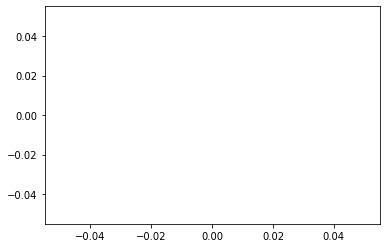

In [2]:
#fastest way to make a plot with plt
#.plot() function creates a blank plot, parameters make adjustments to plot
plt.plot();

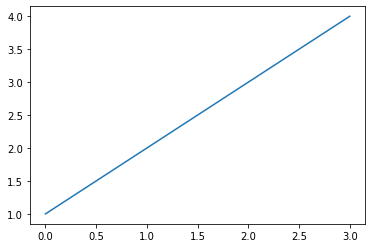

In [3]:
#parameters include x and y axes

plt.plot([1,2,3,4])

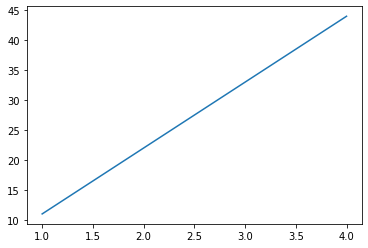

In [4]:
#this way of plotting is referred to as stateless plotting
#plots are also referred to as figures
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

In [5]:
#stateless plotting is less flexible than object-oriented plotting


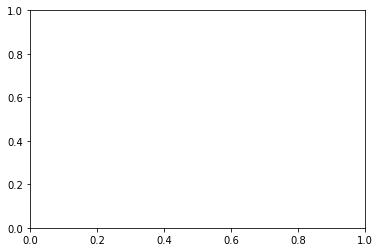

In [6]:
# 1st method
fig = plt.figure() #creates a figure
ax = fig.add_subplot() #adds some axes
plt.show()

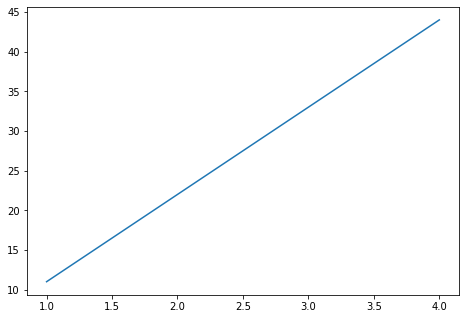

In [7]:
#2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1,1,1,1]) #adds axes'
ax.plot(x,y)


## 3rd method - Recommended usage

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

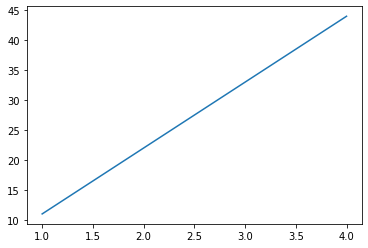

In [8]:
fig, ax = plt.subplots()
ax.plot(x,y);

#object oriented, figure and axes objects
type(fig),type(ax)

##  Matplotlib example workflow

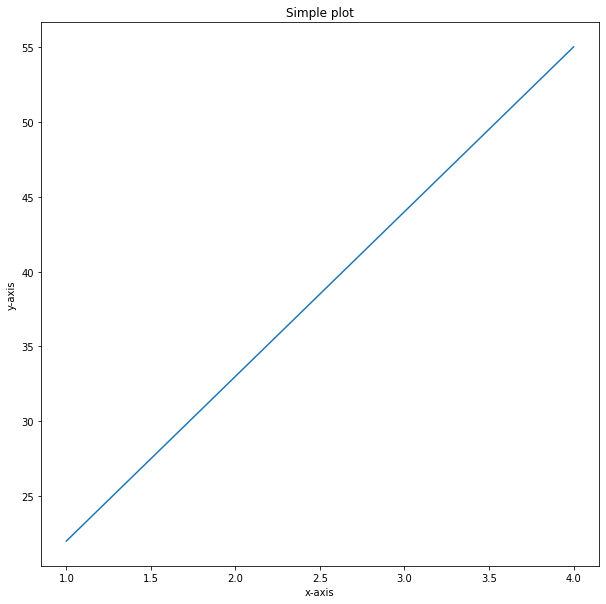

In [9]:
# 0. import matplotlib and get ready for jupyter
%matplotlib inline
import matplotlib.pyplot as plt

#1. prepare data
x = [1,2,3,4]
y = [22,33,44,55]

#2. setup plot
fig, ax = plt.subplots(figsize=(10,10))#figsize is the width, height of plot

#3. plot data
ax.plot(x,y)

#4. customize plots
ax.set(title="Simple plot",
      xlabel="x-axis",
      ylabel="y-axis")
#5. save and display
fig.savefig('images/sample-plot.png')
plt.show();

## Making figures with Numpy arrays
* Line plot
* scatter plot
* bar plot
* histogram
* subplot

In [10]:
#create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

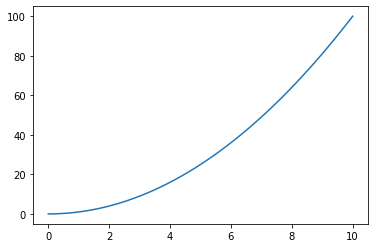

In [11]:
#plot the data
#default plot is a line plot
fig, ax = plt.subplots()
ax.plot(x,x**2);

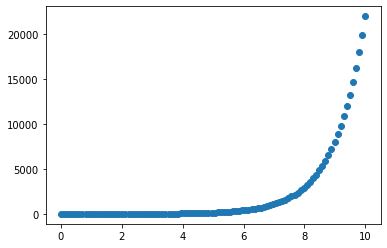

In [12]:
#Use the same data to create a scatter plot
fig, ax = plt.subplots()
ax.scatter(x,np.exp(x));

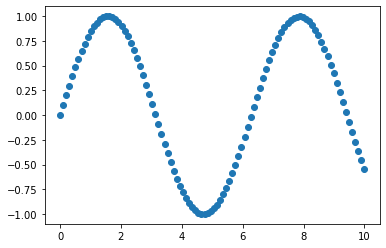

In [13]:
# another scatter plot
fig, ax = plt.subplots()
ax.scatter(x,np.sin(x));

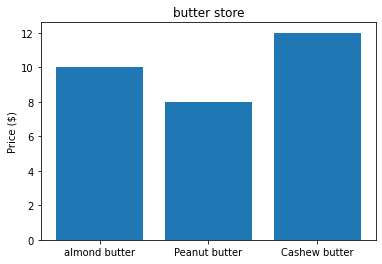

In [14]:
#make a plot from dictionary
butter_prices = {"almond butter": 10,
                "Peanut butter": 8,
                "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(butter_prices.keys(),butter_prices.values());
ax.set(title="butter store", ylabel="Price ($)");

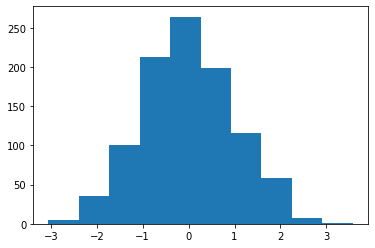

In [15]:
#make some data
x = np.random.randn(1000)
#plot data on histogram
fig, ax = plt.subplots()
ax.hist(x);

## Two Options for Subplots

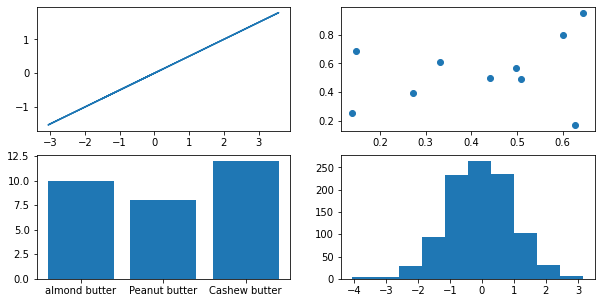

In [16]:
# subplot option 1
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

#plot to each different axis on figure
#an axis on subplot figures are a single graph 
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(butter_prices.keys(), butter_prices.values());
ax4.hist(np.random.randn(1000));

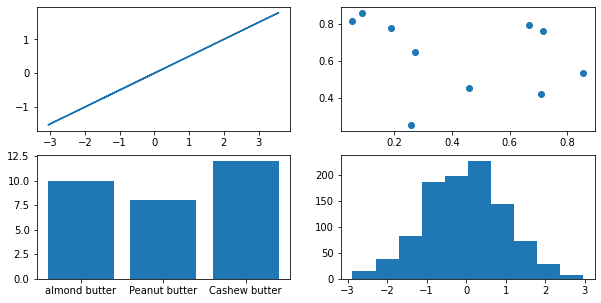

In [17]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,5))
# Plot to each different index
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(butter_prices.keys(), butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [18]:
import pandas as pd


In [19]:
#Make a DataFrame
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<AxesSubplot:>

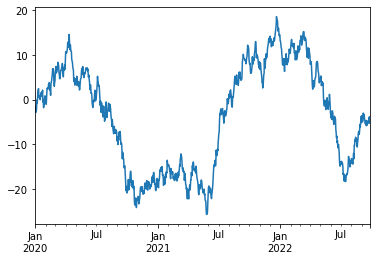

In [20]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2020", periods=1000))
#.cumsum returns cumulative sum of series
ts = ts.cumsum()
ts.plot()

In [21]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [22]:
#remove string properties from price column
car_sales["Price"] = car_sales["Price"].str.replace('[$\,\.]', '')

In [23]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


In [24]:
#remove last two zeros from price column
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [25]:
#add an extra column that has dates for each car sold
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [26]:
#create a new column for total sales, that shows the cumulative sum of the price column
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


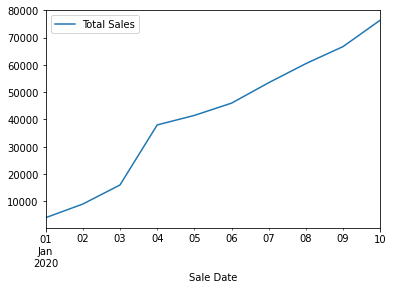

In [27]:
#plot total sales column directly from pandas dataframe
car_sales.plot(x="Sale Date", y="Total Sales");

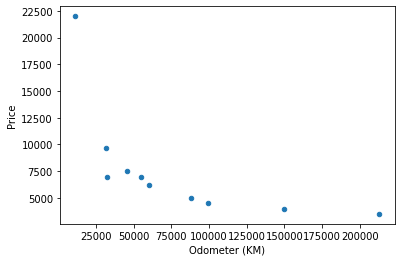

In [28]:
#reassign price column from string to int
car_sales["Price"] = car_sales["Price"].astype(int)
#plot scatter plot with numeric price column
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

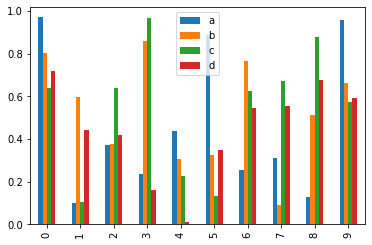

In [29]:
#create a bar graph from pandas dataframe
x = np.random.rand(10,4)
df = pd.DataFrame(x, columns=['a','b','c','d'])
df.plot.bar();

In [30]:
x

array([[0.97029953, 0.80348594, 0.63788606, 0.71902752],
       [0.10124199, 0.59666154, 0.10479005, 0.44192758],
       [0.37245982, 0.37698865, 0.63921875, 0.4175721 ],
       [0.23665928, 0.86053061, 0.9662163 , 0.16352457],
       [0.4381622 , 0.30783409, 0.22586517, 0.00990442],
       [0.88575853, 0.32699979, 0.1350026 , 0.34660905],
       [0.25607764, 0.76649266, 0.62547857, 0.54347292],
       [0.31273693, 0.09013024, 0.67289056, 0.55324079],
       [0.13009409, 0.51332391, 0.87655355, 0.6764979 ],
       [0.95928027, 0.66313649, 0.57185543, 0.59349437]])

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


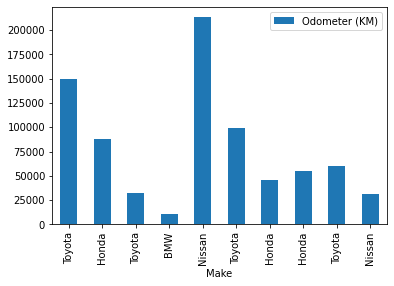

In [32]:
#plot a bar graph with pandas dataframe
car_sales.plot(kind="bar", x="Make", y="Odometer (KM)");

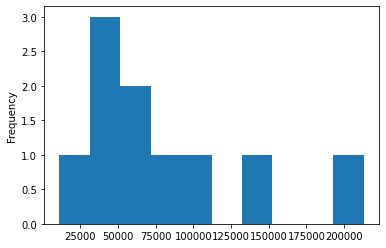

In [33]:
#plot a histogram
#histograms are good for visualizing the spread of data - aka distribution of data
car_sales["Odometer (KM)"].plot(kind='hist');

<AxesSubplot:ylabel='Frequency'>

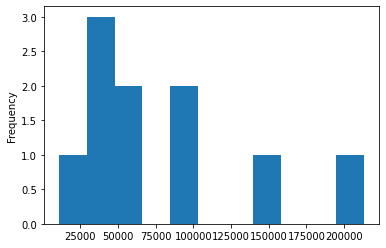

In [34]:
#histograms take the spread of data and categorizes them into bins
#you can manipulate the amount of bins in a historgram
car_sales["Odometer (KM)"].plot(kind='hist', bins=11)
#histograms can be used to find the normal distribution of a dataset

In [35]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:ylabel='Frequency'>

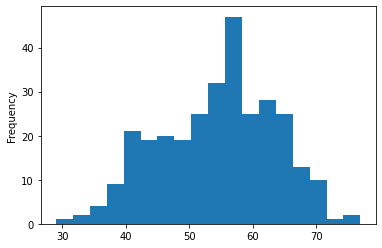

In [36]:
#create a histogram to see distribution of age column
heart_disease['age'].plot(kind='hist',bins=18)

In [37]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


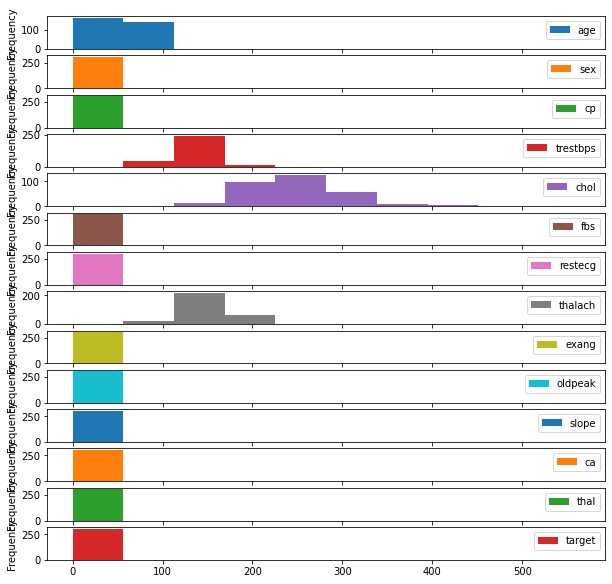

In [38]:
#plot every heart_disease column onto a histogram using subplots
heart_disease.plot.hist(figsize=(10,10),subplots=True);

In [39]:
over_50 = heart_disease[heart_disease["age"] > 50]

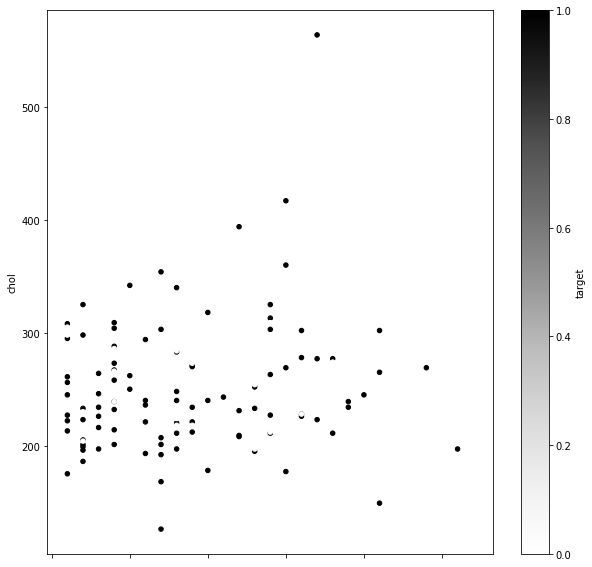

In [40]:
#pyplot method of plotting directly from dataframe - not very good
over_50.plot(figsize=(10,10),kind="scatter", x='age', y='chol', c='target');

(45.0, 100.0)

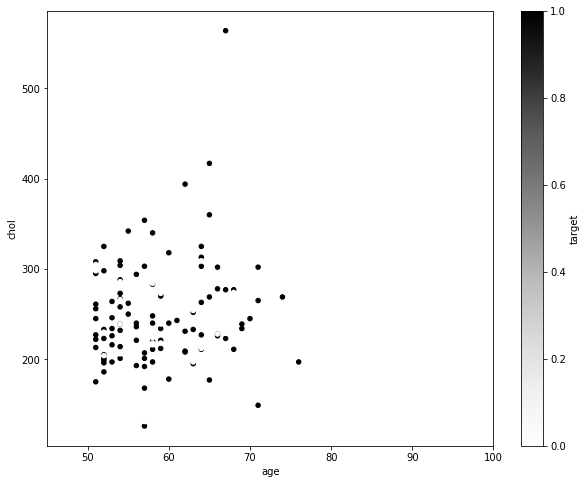

In [41]:
#combination of matplotlib oo method and pyplot method - ok
#c = color
fig, ax = plt.subplots(figsize=(10,8))
over_50.plot(kind="scatter", x="age", y='chol', c='target', ax=ax);
#xlim is setting the bound of the axes'
ax.set_xlim([45,100])

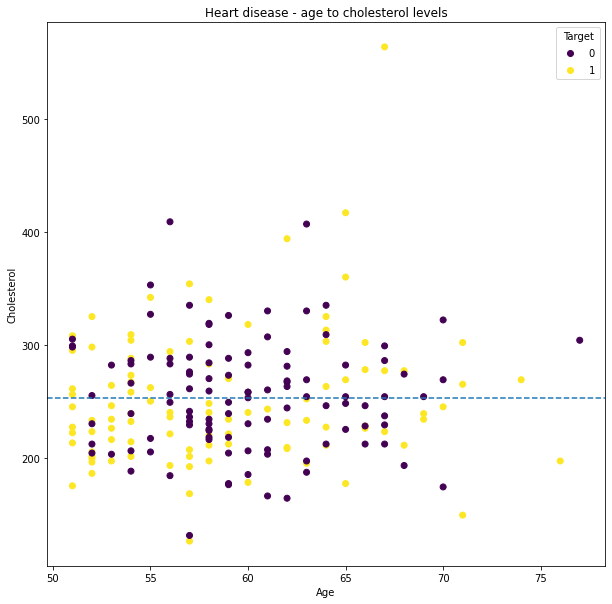

In [42]:
 # matplotlib OO method - preferred usage
#create a figure and an axes
fig, ax = plt.subplots(figsize=(10,10))
#plot the data on the axes
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                    c=over_50['target']);
#customize axes
ax.set(title="Heart disease - age to cholesterol levels",
      xlabel="Age",
      ylabel="Cholesterol");

#add a legend
#* unpacks all of the legend elements received from the color parameter from the scatter variable
ax.legend(*scatter.legend_elements(), title="Target");

#add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

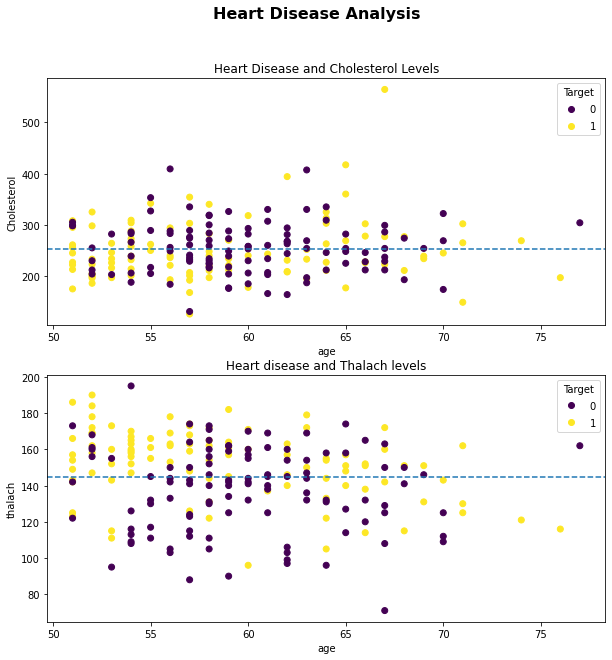

In [46]:
#create a subplot of chol, age, and thalach

#this is a single figure, with two axes' on it
fig, (ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,10));
                            #sharex=True will make both axes share the same x value
#add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);
#customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
       xlabel="age",
       ylabel="Cholesterol");

#add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");

#add a mean line to ax0
ax0.axhline(y=over_50["chol"].mean(), linestyle="--");

#add data to ax1
scatter =ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"]);
#customize ax1
ax1.set(title="Heart disease and Thalach levels",
       xlabel="age",
       ylabel="thalach");

#add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target");

#add a mean line to ax1
ax1.axhline(y=over_50["thalach"].mean(), linestyle="--");

#add a title to the whole figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing matplotlib plots

In [49]:
#check for available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

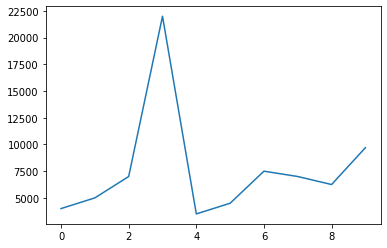

In [52]:
#default style
car_sales["Price"].plot();

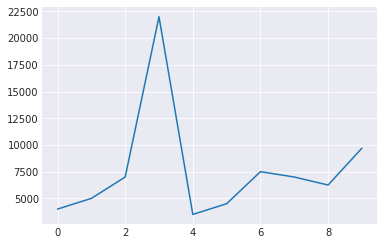

In [54]:
#using another built in style
plt.style.use("seaborn-darkgrid")
car_sales["Price"].plot();

In [57]:
#create some dummy data
x = np.random.randn(10,4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

In [58]:
df

,a,b,c,d
0,-0.958281,-0.909187,1.316436,0.773105
1,0.580057,-1.196770,-0.251570,0.016632
2,-0.501864,0.453111,-1.532030,0.655601
3,-0.788126,1.118557,1.622186,-0.188642
4,0.930779,0.304825,0.285856,-0.923349
5,0.009365,0.235390,-1.222300,0.808834
6,0.660969,0.184648,-2.044988,-0.694261
7,-0.394385,0.165967,-0.908924,-1.311084
8,-0.206150,-0.679625,0.555375,-0.394191
9,1.384983,1.147482,0.316472,-0.103152


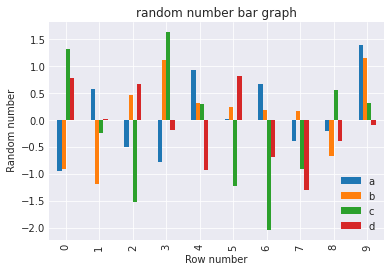

In [63]:
#quick pyplot plot
ax = df.plot(kind="bar")

#customize dummy plot with the set() method
ax.set(title="random number bar graph", 
      xlabel="Row number", ylabel=" Random number")
#make legend visible
ax.legend().set_visible(True);

## Changing style from within a style

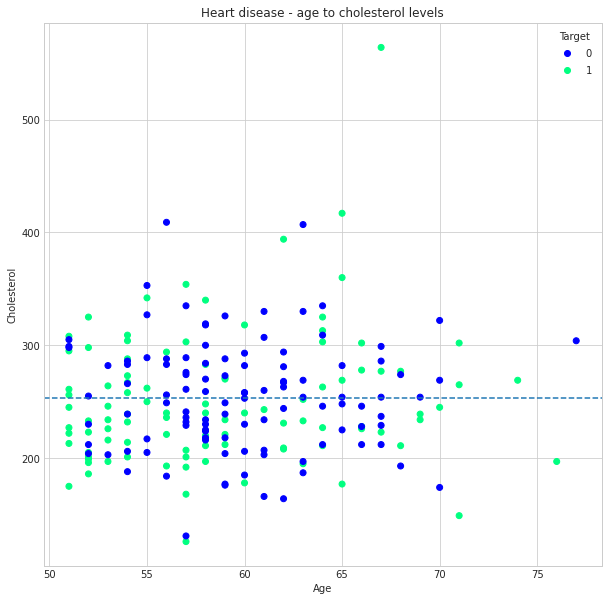

In [69]:
plt.style.use("seaborn-whitegrid")

# matplotlib OO method - preferred usage
#create a figure and an axes
fig, ax = plt.subplots(figsize=(10,10))
#plot the data on the axes
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                    c=over_50['target'],
                    cmap="winter"); #this changes the color scheme of data
#customize axes
ax.set(title="Heart disease - age to cholesterol levels",
      xlabel="Age",
      ylabel="Cholesterol");

#add a legend
#* unpacks all of the legend elements received from the color parameter from the scatter variable
ax.legend(*scatter.legend_elements(), title="Target");

#add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");